### 1-1.

In [1]:
import pandas as pd 

df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_1_obesity_v2.csv",index_col=0)
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,4,male,27,1.80,87,no,no,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,0 to 2,frequently,walking,overweight_level_i,26.851852
1,11,male,26,1.85,105,yes,yes,always,3,frequently,no,more than 2 l,no,2 to 4,>5,sometimes,public_transportation,obesity_type_i,30.679328
2,14,male,41,1.80,99,no,yes,sometimes,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,frequently,automobile,obesity_type_i,30.555556
3,18,female,29,1.53,78,no,yes,sometimes,1,sometimes,no,between 1 and 2 l,no,0,0 to 2,no,automobile,obesity_type_i,33.320518
4,20,female,23,1.65,70,yes,no,sometimes,1,sometimes,no,between 1 and 2 l,no,0,0 to 2,sometimes,public_transportation,overweight_level_i,25.711662


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1262 entries, 0 to 1261
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1262 non-null   object 
 1   Gender                          1262 non-null   object 
 2   Age                             1262 non-null   int64  
 3   Height                          1262 non-null   float64
 4   Weight                          1262 non-null   int64  
 5   family_history_with_overweight  1262 non-null   object 
 6   FAVC                            1262 non-null   object 
 7   FCVC                            1262 non-null   object 
 8   NCP                             1262 non-null   int64  
 9   CAEC                            1262 non-null   object 
 10  SMOKE                           1262 non-null   object 
 11  CH2O                            1262 non-null   object 
 12  SCC                             12

In [3]:
df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               3
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
BMI                               0
dtype: int64

In [4]:
df[df['SCC'].isna()]

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
361,"1,211",male,26,1.837117,106,yes,yes,always,3,sometimes,no,more than 2 l,NaN,2 to 4,>5,sometimes,public_transportation,obesity_type_i,31.322149
675,"1,525",male,25,1.885543,121,yes,yes,sometimes,3,sometimes,no,more than 2 l,NaN,1 to 2,0 to 2,sometimes,public_transportation,obesity_type_ii,34.105146
1100,"1,950",female,20,1.792833,152,yes,yes,always,3,sometimes,no,between 1 and 2 l,NaN,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii,47.424943


C:\Users\User\AppData\Local\Temp\ipykernel_20640\1318379757.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i+1)


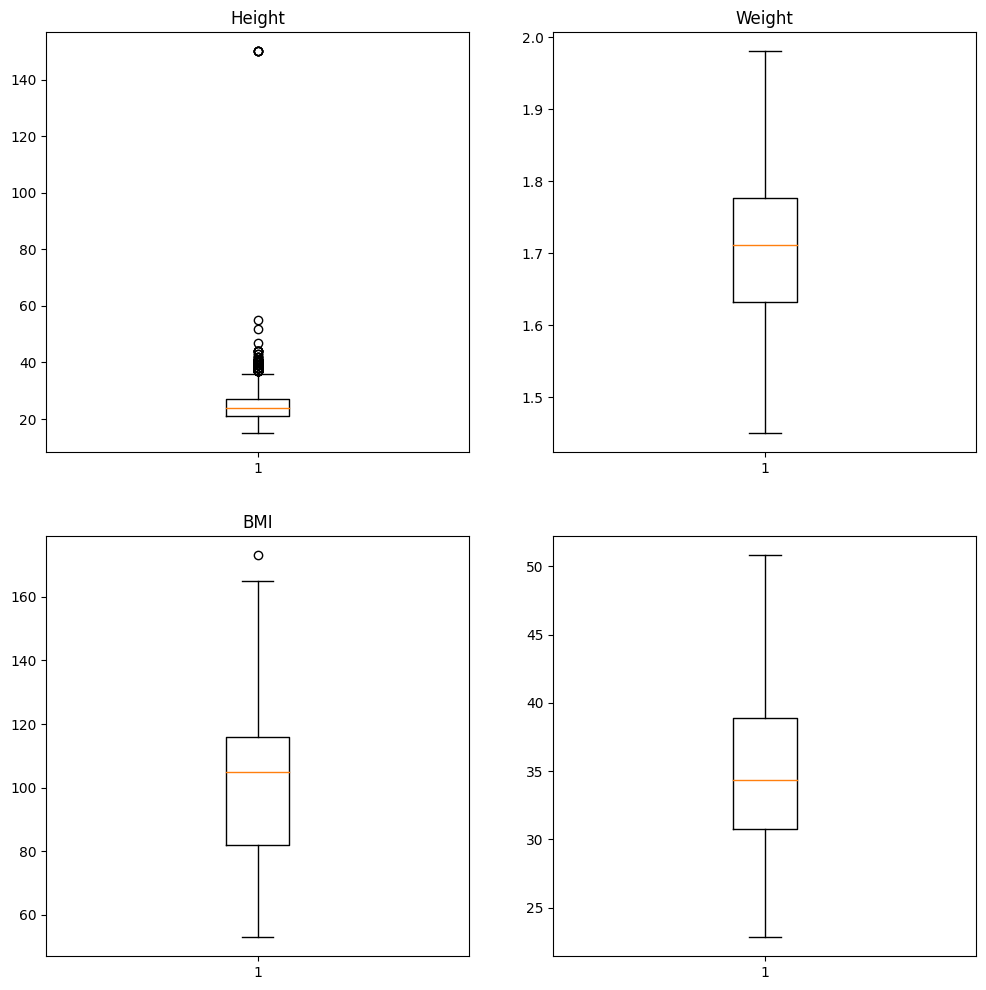

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_col = ['Age', 'Height', 'Weight', 'BMI']

plt.figure(figsize=(12,12))

for i, col in enumerate(numeric_col):
    plt.title(col)
    plt.subplot(2, 2, i+1)
    plt.boxplot(df[col])

plt.show();

In [6]:
df[numeric_col].describe()

,Age,Height,Weight,BMI
count,1262.000000,1262.000000,1262.000000,1262.000000
mean,25.749604,1.709184,101.083201,34.439463
std,9.898088,0.091361,21.520848,6.106623
min,15.000000,1.450000,53.000000,22.826739
25%,21.000000,1.631576,82.000000,30.725995
50%,24.000000,1.711095,105.000000,34.332001
75%,27.000000,1.775768,116.000000,38.920119
max,150.000000,1.980000,173.000000,50.811753


<Figure size 1200x1200 with 0 Axes>

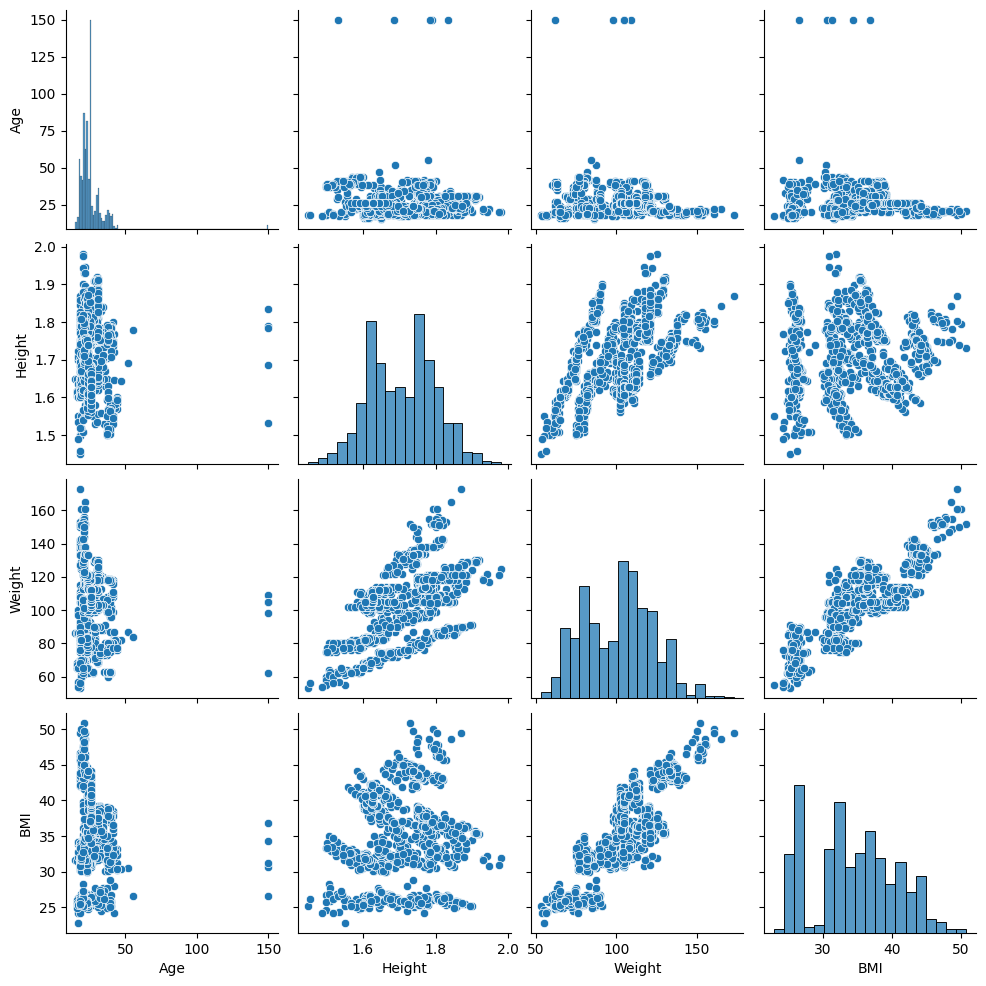

In [7]:
plt.figure(figsize=(12,12))

sns.pairplot(df[numeric_col])

plt.show();

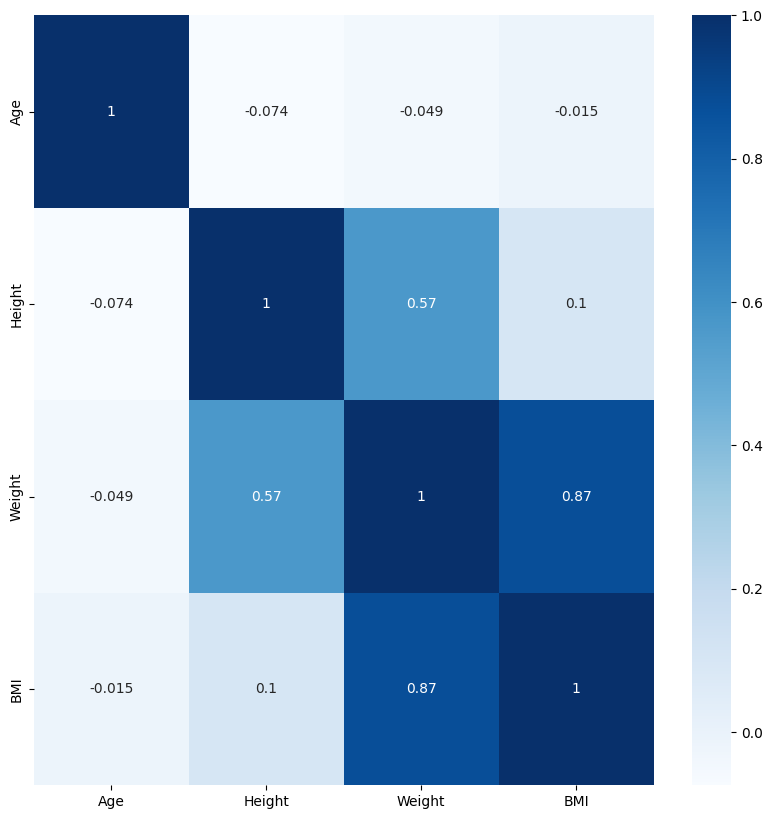

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_col].corr(), annot=True, cmap='Blues')
plt.show();

BMI, 키, 몸무게, 나이를 제외한 데이터는 범주형 변수이고, SCC 컬럼만 3개의 결측치가 확인된다.
또한 Weight - BMI 컬럼은 강한 양의 상관관계를 보이고 있고, Weight - Height 또한 양의 상관관계가 있음을 확인할 수 있다.
기술통계에 따라 Age 컬럼의 경우 최대값이 150으로 확인되는데, 이상치로 판단이 가능해 보인다. 

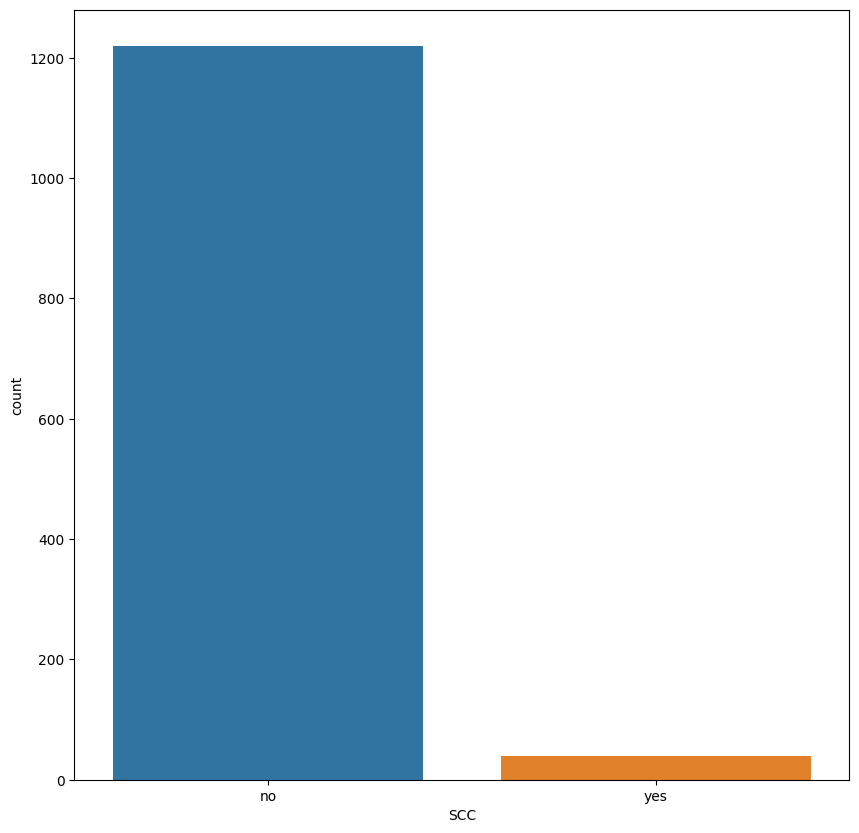

In [9]:
plt.figure(figsize=(10,10))
sns.countplot(x='SCC', data=df)
plt.show();

In [10]:
# 이상치 처리를 위해 Age 컬럼 확인
df[(df['Age'] > 50) | (df['Age'] < 0)]

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
5,22,female,52,1.690000,87,yes,yes,always,1,sometimes,yes,between 1 and 2 l,no,0,0 to 2,no,automobile,obesity_type_i,30.461118
16,93,male,55,1.780000,84,yes,no,always,4,frequently,no,more than 2 l,yes,4 to 5,0 to 2,frequently,walking,overweight_level_i,26.511804
300,918,female,150,1.532322,62,yes,yes,sometimes,3,sometimes,no,more than 2 l,no,0,3 to 5,sometimes,automobile,overweight_level_i,26.583025
467,"1,317",male,150,1.789992,98,yes,yes,sometimes,2,sometimes,no,more than 2 l,no,1 to 2,3 to 5,sometimes,automobile,obesity_type_i,30.592879
494,"1,344",male,150,1.783906,109,yes,yes,sometimes,2,sometimes,no,between 1 and 2 l,no,1 to 2,3 to 5,no,public_transportation,obesity_type_i,34.316974
528,"1,378",male,150,1.834842,105,yes,yes,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,sometimes,automobile,obesity_type_i,31.247534
1193,"2,043",female,150,1.686033,105,yes,yes,always,3,sometimes,no,less than a liter,no,0,3 to 5,sometimes,public_transportation,obesity_type_iii,36.856473


In [11]:
# 결측값 처리를 위해 SCC 컬럼 확인
df[df['SCC'].isna()]

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
361,"1,211",male,26,1.837117,106,yes,yes,always,3,sometimes,no,more than 2 l,NaN,2 to 4,>5,sometimes,public_transportation,obesity_type_i,31.322149
675,"1,525",male,25,1.885543,121,yes,yes,sometimes,3,sometimes,no,more than 2 l,NaN,1 to 2,0 to 2,sometimes,public_transportation,obesity_type_ii,34.105146
1100,"1,950",female,20,1.792833,152,yes,yes,always,3,sometimes,no,between 1 and 2 l,NaN,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii,47.424943


In [12]:
cond_df = df[(df['family_history_with_overweight'] == 'yes') & (df['FAVC'] == 'yes') & (df['NCP'] == 3) & (df['CAEC'] == 'sometimes') & (df['SMOKE'] == 'no') & (df['CALC'] == 'sometimes') & (df['MTRANS'] == 'public_transportation')]
cond_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
8,41,female,21,1.670000,75,yes,yes,sometimes,3,sometimes,no,between 1 and 2 l,no,1 to 2,0 to 2,sometimes,public_transportation,overweight_level_i,26.892323
34,155,male,22,1.740000,94,yes,yes,sometimes,3,sometimes,no,between 1 and 2 l,no,0,0 to 2,sometimes,public_transportation,obesity_type_i,31.047695
58,220,female,21,1.600000,68,yes,yes,sometimes,3,sometimes,no,more than 2 l,no,1 to 2,0 to 2,sometimes,public_transportation,overweight_level_i,26.562500
79,325,female,30,1.650000,71,yes,yes,sometimes,3,sometimes,no,less than a liter,no,0,0 to 2,sometimes,public_transportation,overweight_level_i,26.078972
81,330,female,19,1.650000,82,yes,yes,always,3,sometimes,no,less than a liter,no,0,3 to 5,sometimes,public_transportation,obesity_type_i,30.119376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,"2,107",female,21,1.710730,131,yes,yes,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,sometimes,public_transportation,obesity_type_iii,44.901475
1258,"2,108",female,22,1.748584,134,yes,yes,always,3,sometimes,no,between 1 and 2 l,no,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii,43.741923
1259,"2,109",female,23,1.752206,134,yes,yes,always,3,sometimes,no,between 1 and 2 l,no,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii,43.543817
1260,"2,110",female,24,1.739450,133,yes,yes,always,3,sometimes,no,more than 2 l,no,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii,44.071535


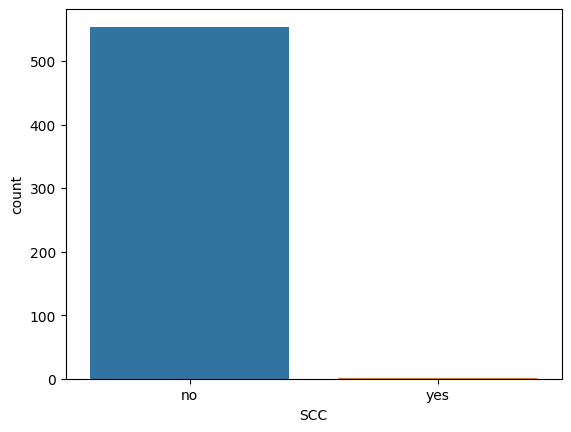

In [13]:
sns.countplot(x='SCC', data=cond_df);

Age 컬럼의 150은 임의의 값이라고 짐작되기 때문에 이상치로 판단되는 150을 제외한 최대값인 55로 대체한다.

SCC 컬럼의 경우 유사한 조건의 데이터를 확인한 결과 대부분이 no 이고, 결측치로 확인된 3개의 데이터 중 Age, BMI 컬럼의 데이터는 평균 부근의 관측치이기 때문에 no로 대체한다.

In [14]:
# 이상치 / 결측치 처리
age_idx = df[(df['Age'] == 150)].index
scc_idx = df[df['SCC'].isna()].index

df.loc[age_idx, 'Age'] = 55
df.loc[scc_idx, 'SCC'] = 'no'

### 1-2.
#### 데이터 전처리 기법

1. MinMax Scaling : 피처 값의 범위를 0~1로 조정하는 기법으로, 조정 후 최소값은 0, 최대값은 1로, 해당 데이터에서 해당 변수의 최소값을 뺀 값을 변수의 최대값과 최소값의 차이로 나누는 방법이다.

2. One-Hot Encoding : 범주형 데이터 변수를 머신러닝 모델에 입력하기 위해 숫자형 데이터로 변환하기 위해 변수를 0과 1로 나타내기 위한 방법으로, 신규 컬럼이 생성된다.
    
원-핫 인코딩을 통해 일반적으로 사용할 수 없는 범주형 데이터를 머신러닝 모델에 활용할 수 있고, 스케일링을 통해서는 데이터의 편차를 줄여 과적합을 방지할 수 있다.

추가로 종속변수는 분류모델의 레이블로 사용할 수 있도록 Label Encoding 을 진행해준다.

In [15]:
# 데이터 전처리를 위한 범주형 변수 확인
cat_col = [i for i in df.columns if i not in numeric_col]
cat_col[1:]

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [16]:
for col in cat_col[1:]:
    print(df[col].unique())

['male' 'female']
['no' 'yes']
['no' 'yes']
['always' 'sometimes' 'never']
[3 1 4 2]
['sometimes' 'frequently' 'always' 'no']
['no' 'yes']
['between 1 and 2 l' 'more than 2 l' 'less than a liter']
['no' 'yes']
['2 to 4' '0' '1 to 2' '4 to 5']
['0 to 2' '>5' '3 to 5']
['frequently' 'sometimes' 'no']
['walking' 'public_transportation' 'automobile' 'motorbike' 'bike']
['overweight_level_i' 'obesity_type_i' 'obesity_type_ii'
 'obesity_type_iii']


In [17]:
df['NCP'] = df['NCP'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1262 entries, 0 to 1261
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1262 non-null   object 
 1   Gender                          1262 non-null   object 
 2   Age                             1262 non-null   int64  
 3   Height                          1262 non-null   float64
 4   Weight                          1262 non-null   int64  
 5   family_history_with_overweight  1262 non-null   object 
 6   FAVC                            1262 non-null   object 
 7   FCVC                            1262 non-null   object 
 8   NCP                             1262 non-null   object 
 9   CAEC                            1262 non-null   object 
 10  SMOKE                           1262 non-null   object 
 11  CH2O                            1262 non-null   object 
 12  SCC                             12

In [18]:
one_hot_df = pd.get_dummies(df[cat_col[1:-1]])
one_hot_df

,Gender_female,Gender_male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,FCVC_always,FCVC_never,FCVC_sometimes,NCP_1,...,TUE_3 to 5,TUE_>5,CALC_frequently,CALC_no,CALC_sometimes,MTRANS_automobile,MTRANS_bike,MTRANS_motorbike,MTRANS_public_transportation,MTRANS_walking
0,0,1,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,1,0,1,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,1,1,0,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,0
3,1,0,1,0,0,1,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
4,1,0,0,1,1,0,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1,0,0,1,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1258,1,0,0,1,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1259,1,0,0,1,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1260,1,0,0,1,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [19]:
drop_df = pd.concat([df.drop(columns=cat_col[1:]), one_hot_df], axis=1)
drop_df

,id,Age,Height,Weight,BMI,Gender_female,Gender_male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,...,TUE_3 to 5,TUE_>5,CALC_frequently,CALC_no,CALC_sometimes,MTRANS_automobile,MTRANS_bike,MTRANS_motorbike,MTRANS_public_transportation,MTRANS_walking
0,4,27,1.800000,87,26.851852,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,1
1,11,26,1.850000,105,30.679328,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,14,41,1.800000,99,30.555556,0,1,1,0,0,...,1,0,1,0,0,1,0,0,0,0
3,18,29,1.530000,78,33.320518,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4,20,23,1.650000,70,25.711662,1,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,"2,107",21,1.710730,131,44.901475,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1258,"2,108",22,1.748584,134,43.741923,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1259,"2,109",23,1.752206,134,43.543817,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1260,"2,110",24,1.739450,133,44.071535,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0


In [20]:
# 스케일링은 훈련 / 테스트 세트 분리 후 전처리를 시행한다.

### 1-3.

해당 데이터는 비만인지 아닌지에 대한 의료 데이터이다. 따라서 몸무게가 관찰치의 평균 이상인지 이하인지에 관한 파생변수 Weight_Mean (평균 이상일 경우 1, 아닐 경우 0)을 생성하여 분석에 활용한다.

In [21]:
weight_avg = drop_df.Weight.mean()

drop_df['Weight_Mean'] = drop_df['Weight'].apply(lambda x: 1 if x >= weight_avg else 0)
drop_df

,id,Age,Height,Weight,BMI,Gender_female,Gender_male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,...,TUE_>5,CALC_frequently,CALC_no,CALC_sometimes,MTRANS_automobile,MTRANS_bike,MTRANS_motorbike,MTRANS_public_transportation,MTRANS_walking,Weight_Mean
0,4,27,1.800000,87,26.851852,0,1,1,0,1,...,0,1,0,0,0,0,0,0,1,0
1,11,26,1.850000,105,30.679328,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
2,14,41,1.800000,99,30.555556,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,18,29,1.530000,78,33.320518,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
4,20,23,1.650000,70,25.711662,1,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,"2,107",21,1.710730,131,44.901475,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
1258,"2,108",22,1.748584,134,43.741923,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
1259,"2,109",23,1.752206,134,43.543817,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
1260,"2,110",24,1.739450,133,44.071535,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1


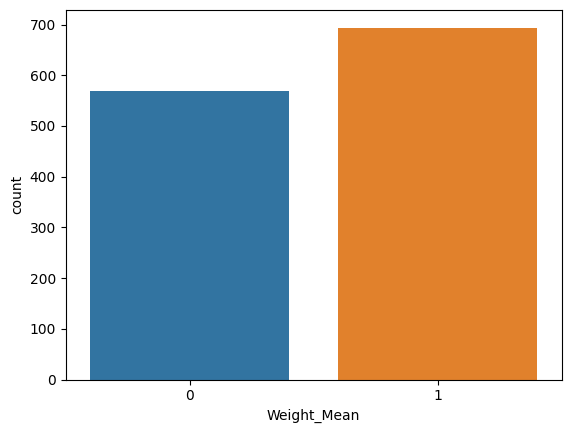

In [22]:
sns.countplot(x=drop_df['Weight_Mean'], data=drop_df)
plt.show();

In [23]:
# 종속변수 Label Encodng
encode = {j:i for i, j in enumerate(df['NObeyesdad'].unique())}
label = df['NObeyesdad'].map(lambda x: encode[x])
label

0       0
1       1
2       1
3       1
4       0
       ..
1257    3
1258    3
1259    3
1260    3
1261    3
Name: NObeyesdad, Length: 1262, dtype: int64

### 2-1.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
# 훈련 테스트 세트 분리

x_train, x_test, y_train, y_test = train_test_split(drop_df.iloc[:,1:], label, stratify=label, test_size=0.3, random_state=2024)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((883, 44), (379, 44), (883,), (379,))

In [26]:
# 스케일링
scaler = MinMaxScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [27]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
mnb = MultinomialNB()

In [28]:
models = [lr, dt, mnb]

acc = []

for model in models:
    model.fit(scaled_x_train, y_train)
    preds = model.predict(x_test)
    acc.append({str(model):accuracy_score(y_test, preds)})
    
acc

D:\AI_Project\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\AI_Project\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
D:\AI_Project\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
D:\AI_Project\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


[{'LogisticRegression()': 0.23482849604221637},
 {'DecisionTreeClassifier()': 0.49076517150395776},
 {'MultinomialNB()': 0.35883905013192613}]

아무 튜닝 없이 로지스틱 회귀모델, 의사결정 나무모델, 나이브 베이즈 분류모델을 비교했을 때, 나이브 베이즈 분류기의 성능이 가장 좋으므로 나이브 베이즈 분류기를 튜닝하여 사용한다.

### 2-2.

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
import warnings
warnings.filterwarnings('ignore')

mnb_grid = {'alpha':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.25, 0.5, 1, 1.25, 1.5]}

gs_mnb = GridSearchCV(estimator=mnb, param_grid=mnb_grid, scoring='accuracy', cv=3, return_train_score=True)

gs_mnb.fit(scaled_x_train, y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.25, 0.5, 1, 1.25, 1.5]},
             return_train_score=True, scoring='accuracy')

In [31]:
gs_mnb.best_params_

{'alpha': 0.1}

In [32]:
gs_mnb.best_score_

0.7825627426111686

In [33]:
model = MultinomialNB(alpha=0.1)
model.fit(scaled_x_train, y_train)
preds = model.predict(scaled_x_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77        87
           1       0.69      0.69      0.69       106
           2       0.77      0.88      0.82        89
           3       0.98      1.00      0.99        97

    accuracy                           0.82       379
   macro avg       0.82      0.82      0.82       379
weighted avg       0.82      0.82      0.82       379



In [34]:
confusion_matrix(y_test, preds)

array([[62, 22,  3,  0],
       [11, 73, 20,  2],
       [ 0, 11, 78,  0],
       [ 0,  0,  0, 97]], dtype=int64)

### 2-3.

In [35]:
from sklearn.ensemble import VotingClassifier

In [36]:
vote = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('mnb', mnb)], voting='soft')

In [37]:
vote.fit(scaled_x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('mnb', MultinomialNB())],
                 voting='soft')

In [38]:
vote_pred = vote.predict(scaled_x_test)
print(classification_report(y_test, vote_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       0.97      0.92      0.94       106
           2       0.91      0.97      0.94        89
           3       0.99      1.00      0.99        97

    accuracy                           0.97       379
   macro avg       0.97      0.97      0.97       379
weighted avg       0.97      0.97      0.97       379



In [40]:
import numpy as np

recall_avg = np.mean(pd.DataFrame(classification_report(y_test, vote_pred, output_dict=True)).loc['recall'][:4].tolist())
recall_avg

0.9703466186135256

In [ ]:
confusion_matrix(y_test, vote_pred)

튜닝된 Multinomial 나이브 베이즈 분류기보다 월등하게 성능이 좋은 것을 확인할 수 있다. 특히 첫 번째, 네 번째 범주에 대한 분류에 대해서는 오분류가 없고, 정밀도와 재현율 또한 나이브 베이즈 분류기 각각의 수치에 비해 월등히 좋음을 확인할 수 있다.

### 3-1.

In [41]:
col_name = x_train.columns
scaled_train_df = pd.DataFrame(scaled_x_train, columns=col_name)
scaled_test_df = pd.DataFrame(scaled_x_test, columns=col_name) 

scaled_train_df

,Age,Height,Weight,BMI,Gender_female,Gender_male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,...,TUE_>5,CALC_frequently,CALC_no,CALC_sometimes,MTRANS_automobile,MTRANS_bike,MTRANS_motorbike,MTRANS_public_transportation,MTRANS_walking,Weight_Mean
0,0.175,0.673608,0.436975,0.294611,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.200,0.615596,0.428571,0.322455,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.075,0.657022,0.462185,0.338010,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.075,0.225424,0.092437,0.045762,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.175,0.495268,0.663866,0.756730,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,0.275,0.531178,0.218487,0.073233,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
879,0.125,0.648037,0.260504,0.070318,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
880,0.200,0.327342,0.294118,0.321700,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
881,0.575,0.160023,0.184874,0.255112,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [59]:
normal_col_name = df.columns[1:-2].tolist() + df.columns[-1:].tolist()
normal_col_name

['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'BMI']

In [70]:
result_list = []

for exclud_col in normal_col_name:
    dropped_columns = [col for col in col_name if exclud_col not in col]
    vote.fit(scaled_train_df[dropped_columns], y_train)
    vote_pred = vote.predict(scaled_test_df[dropped_columns])
    result_list.append((exclud_col, np.mean(pd.DataFrame(classification_report(y_test, vote_pred, output_dict=True)).loc['recall'][:4].tolist()) - recall_avg))

result_list

[('Gender', -0.0018019927920288614),
 ('Age', 0.0),
 ('Height', 0.0),
 ('Weight', 0.002808988764044895),
 ('family_history_with_overweight', 0.0),
 ('FAVC', 0.0),
 ('FCVC', 0.014150943396226467),
 ('NCP', 0.009433962264150941),
 ('CAEC', -0.002873563218390829),
 ('SMOKE', 0.0),
 ('CH2O', 0.009884460462158073),
 ('SCC', 0.0),
 ('FAF', 0.007525969896120421),
 ('TUE', 0.004716981132075526),
 ('CALC', 0.007075471698113178),
 ('MTRANS', 0.007525969896120421),
 ('BMI', 0.0003213492893154868)]

In [72]:
drop_col_score = sorted(result_list, key=lambda x: x[1], reverse=True)
drop_col_score

[('FCVC', 0.014150943396226467),
 ('CH2O', 0.009884460462158073),
 ('NCP', 0.009433962264150941),
 ('FAF', 0.007525969896120421),
 ('MTRANS', 0.007525969896120421),
 ('CALC', 0.007075471698113178),
 ('TUE', 0.004716981132075526),
 ('Weight', 0.002808988764044895),
 ('BMI', 0.0003213492893154868),
 ('Age', 0.0),
 ('Height', 0.0),
 ('family_history_with_overweight', 0.0),
 ('FAVC', 0.0),
 ('SMOKE', 0.0),
 ('SCC', 0.0),
 ('Gender', -0.0018019927920288614),
 ('CAEC', -0.002873563218390829)]

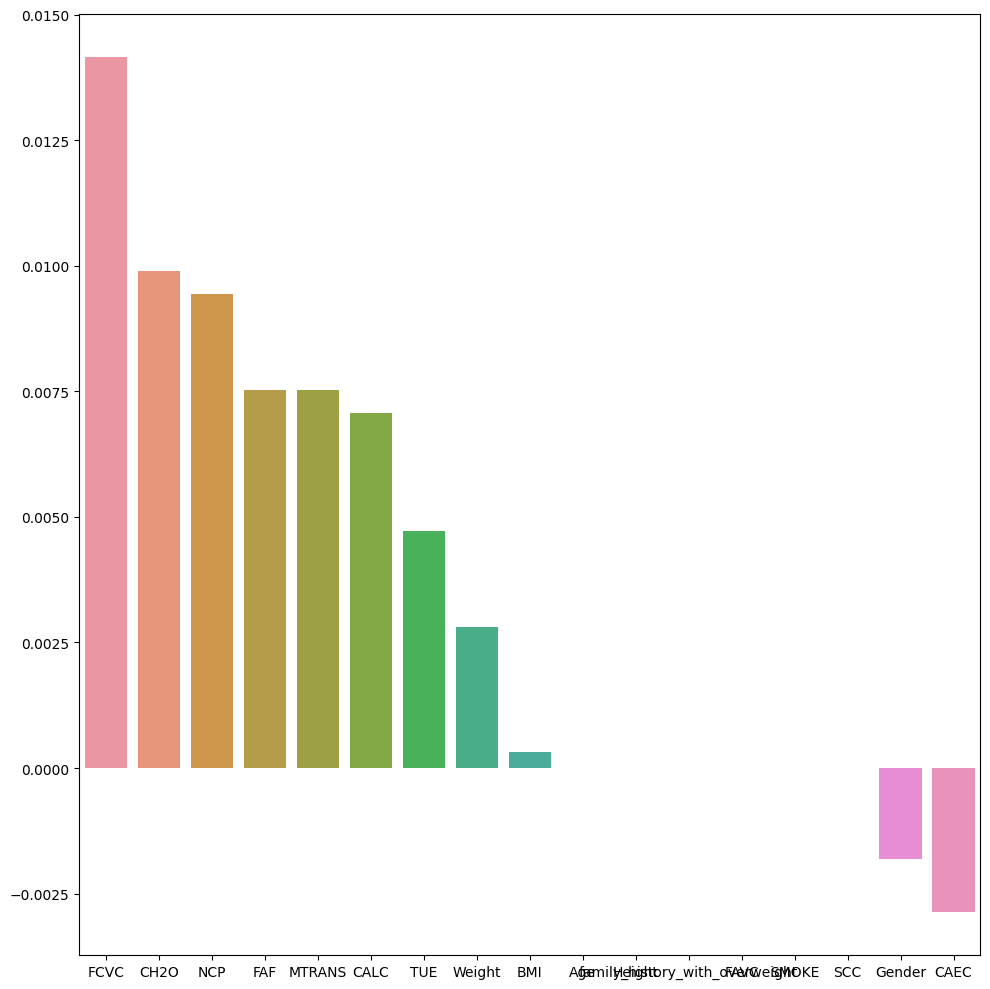

In [73]:
plt.figure(figsize=(10,10))
sns.barplot(x = [i for i, j in drop_col_score], y = [j for i, j in drop_col_score])
plt.tight_layout()
plt.show();

### 4-1.

In [69]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_2_v2.csv')
df.head()

,ID,키,weight,생년월일,건강검진일,공학여부,채소섭취정도,아침식사여부,일주일운동시간,수면시간,성별
0,ID_4135,169.01,65.47,20041003,2020_11_15,1,2,1,4.4,8.3,남성
1,ID_3289,181.62,69.36,19970725,2014_11_20,0,3,0,4.4,6.9,남성
2,ID_1847,160.89,65.12,20020921,2020_01_28,1,1,1,1.7,9.6,여성
3,ID_4785,162.21,62.28,20020106,2018_09_27,1,4,0,5.1,6.8,남성
4,ID_5693,159.13,54.11,19980708,2015_03_03,0,4,1,0.3,8.5,여성
